In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "PLTR"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,10.00,11.410,9.11,9.50,9.50,338584400
2020-10-01,9.69,10.100,9.23,9.46,9.46,124297600
2020-10-02,9.06,9.280,8.94,9.20,9.20,55018300
2020-10-05,9.43,9.490,8.92,9.03,9.03,36316900
2020-10-06,9.04,10.180,8.90,9.90,9.90,90864000
...,...,...,...,...,...,...
2023-05-02,7.72,7.910,7.43,7.59,7.59,38008000
2023-05-03,7.62,7.680,7.45,7.56,7.56,24322400
2023-05-04,7.47,7.520,7.28,7.38,7.38,29989300


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 655 entries, 2020-09-30 to 2023-05-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       655 non-null    float64
 1   High       655 non-null    float64
 2   Low        655 non-null    float64
 3   Close      655 non-null    float64
 4   Adj Close  655 non-null    float64
 5   Volume     655 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 35.8 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,10.00,11.41,9.11,9.50,9.50,338584400
2020-10-01,9.69,10.10,9.23,9.46,9.46,124297600
2020-10-02,9.06,9.28,8.94,9.20,9.20,55018300
2020-10-05,9.43,9.49,8.92,9.03,9.03,36316900
2020-10-06,9.04,10.18,8.90,9.90,9.90,90864000


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-02,7.72,7.910,7.43,7.59,7.59,38008000
2023-05-03,7.62,7.680,7.45,7.56,7.56,24322400
2023-05-04,7.47,7.520,7.28,7.38,7.38,29989300
2023-05-05,7.44,7.550,7.32,7.41,7.41,45601300
2023-05-08,7.64,7.855,7.59,7.74,7.74,102531300


In [7]:
data.shape

(655, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,655.000000,655.000000,655.000000,655.000000,655.000000,6.550000e+02
mean,15.952983,16.432243,15.452127,15.928046,15.928046,4.898885e+07
std,7.984176,8.269042,7.644759,7.929368,7.929368,3.692387e+07
min,5.980000,6.170000,5.920000,6.000000,6.000000,9.126400e+06
25%,8.335000,8.505000,8.135000,8.330000,8.330000,2.914935e+07
50%,13.010000,13.410000,12.620000,12.980000,12.980000,3.823530e+07
75%,23.775001,24.290000,23.085000,23.565000,23.565000,5.455640e+07
max,39.540001,45.000000,36.130001,39.000000,39.000000,3.385844e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

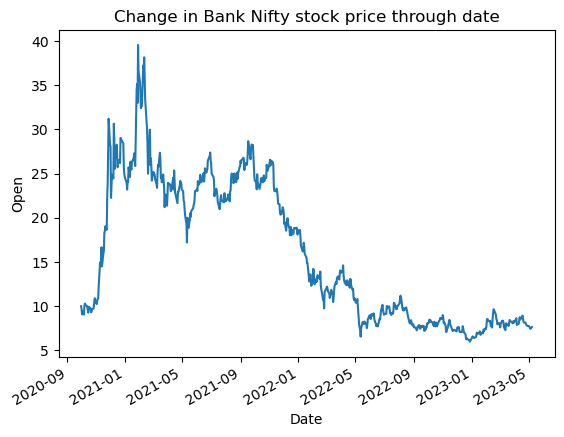

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in Bank Nifty stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((491, 3), (164, 3))

In [15]:
y_train.shape,y_test.shape

((491,), (164,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[ 8.70400002 21.15530025 10.17849997 27.17570009  9.30159998 14.24290006
  7.93870001 24.49120026  7.39030003 23.73900043  9.75479994 16.67939964
 23.27099983  8.24780013  7.05880005  8.72030005  8.05299997  8.10259998
 25.74219971  7.18660006  6.42340006 21.1570006  12.06889982 26.11779997
  9.96749998 11.08959991 10.61420022  8.3424999   8.21859986  8.05360001
 23.25839981 18.78089975 28.04789972  7.76059999 20.40989992  8.67850001
  7.78730001 12.69159984 26.26480005 13.1725     21.72779978  8.279
  6.97560002  7.64030003  6.95200007  6.11800001 11.8816999   8.1344999
 31.1047002  27.19700031 22.45659966 21.61899958  9.92050002 27.32099985
 11.84159987 20.26369947  7.93340012 13.86470009 23.20660017  8.15929993
  9.71139994 24.5688998  25.82990007 23.7625      7.92400005  8.28609987
  9.17430016 10.55649997 25.03079994 21.98199986 11.25079983 23.52580002
  9.65990002 24.86499989  8.00099997 37.57199947 19.06879978  9.69849998
  8.2548      8.07559999  8.17479992 37.11119884  6.39790

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9962618651200263


In [22]:
y_test=list(y_test)

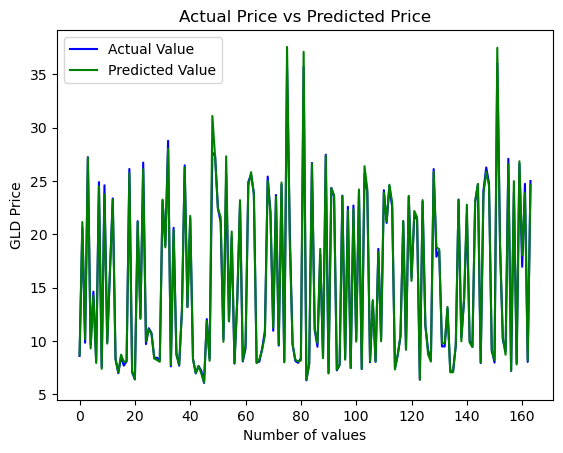

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

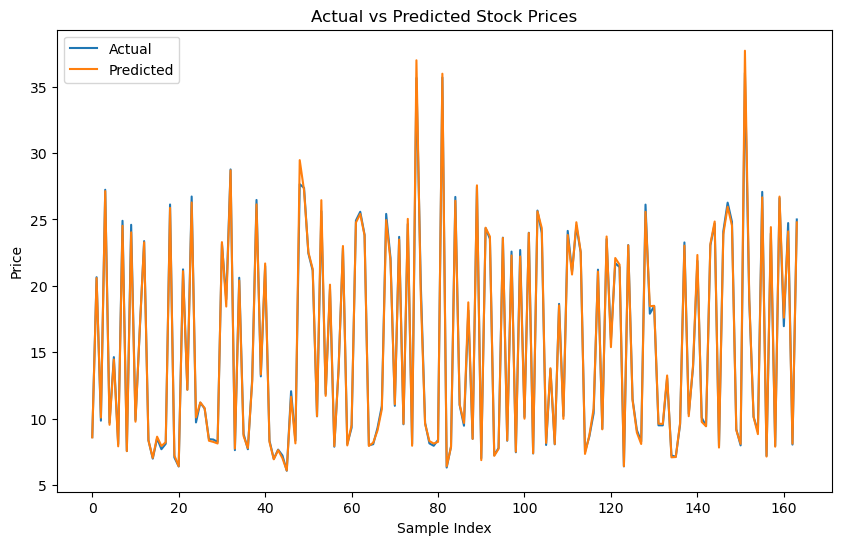

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([10.37968036,  9.65260327,  9.14025021,  9.09455591,  9.78959369,
       10.34327792, 10.15013144,  9.99870128,  9.76529638,  9.52971337,
        9.41622215,  9.68525547,  9.74136706,  9.62162837,  9.40103407,
        9.36536946,  9.54611478,  9.62388263,  9.82172442, 10.71952335,
       10.48217267, 10.79593475, 10.09062573, 10.48916197, 10.75232095,
       10.69479392, 11.7825159 , 14.13317113, 15.0139934 , 13.63040402,
       15.48315557, 15.24684242, 15.61420322, 15.34154544, 18.03518096,
       18.43558749, 18.44261458, 18.71142117, 20.67799761, 22.4629507 ,
       28.05143549, 29.03770023, 26.50773593, 25.34615407, 22.26606757,
       25.04125198, 24.09481687, 27.82070836, 28.49699751, 26.24491238,
       27.08991851, 27.14000062, 27.08111714, 26.0259629 , 25.57546964,
       26.84028659, 26.33019768, 27.44325915, 27.62389092, 28.57603868,
       28.07913922, 26.25099814, 24.98689161, 25.39844256, 23.84170036,
       23.26681186, 24.05792793, 23.70062258, 24.61319553, 25.47

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value324
enter a value4353
enter a value435
3464.0539128966543


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("PLTR_model.pkl",'wb')
pickle.dump(model,file)